In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
 
X = data
y = target
#print(X)
#print(y)
print(X.shape,y.shape)
print(X.shape[0])

(506, 13) (506,)
506


In [2]:
#1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 13)
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit_transform(X_test)
scaler.fit_transform(X_train)

0.7984189723320159
0.2015810276679842


array([[-0.40167066,  0.42628454, -0.77665843, ..., -0.75491924,
         0.38123944, -0.43117188],
       [-0.31387872,  0.38267929, -1.02184745, ..., -2.53027466,
         0.3626938 , -0.28319255],
       [-0.40161932,  2.99899459, -1.10993931, ..., -1.0819584 ,
         0.4158501 , -0.31365888],
       ...,
       [-0.39732048, -0.48942581,  0.27897574, ...,  0.13275847,
         0.39246133, -0.815628  ],
       [-0.39838878, -0.48942581, -1.01010187, ..., -0.848359  ,
         0.37249818, -0.33251899],
       [-0.40293086, -0.48942581, -0.84272733, ...,  0.83355666,
         0.40687259, -0.56464344]])

In [3]:
#2

from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_pred = linreg.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

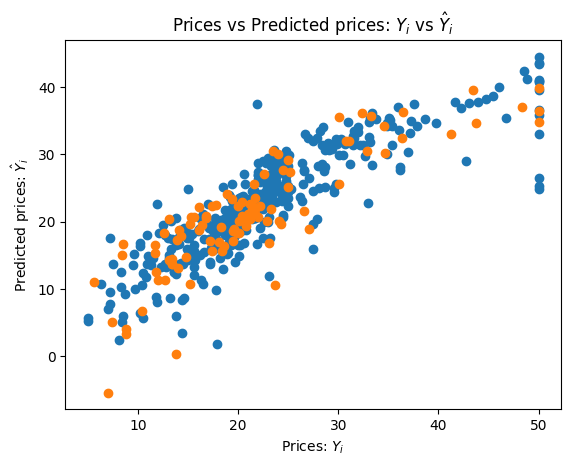

In [4]:
plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [5]:
# Idealnie dopasowane dane na wykresie dla regresji liniowej powinny tworzyć linię prosta o minimalnym błędzie dopasowania.
# Oznacza to, że każdy punkt danych powinien znajdować się na prostej regresji, a błąd dopasowania dla każdego punktu powinien
# być minimalny.

# W przypadku overfittingu zbyt skomplikowany model dopasowuje się do nieregularnych szumów w danych treningowych, co prowadzi
# do bardzo dobrego dopasowania na zbiorze treningowym, ale zwykle bardzo złych wyników na nowych danych, czyli wysokiej
# wartości błędu predykcji.

#3

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(linreg, X_test, y_pred, scoring='neg_mean_squared_error') * -1)

1.5871310428010597e-26

In [6]:
#4

cross_val_score(linreg, X_test, y_test, scoring='neg_mean_squared_error')
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.7317666881184424
0.738661521750315


In [7]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features = PolynomialFeatures(degree=2)

X_trainpoly = polynomial_features.fit_transform(X_train)
X_testpoly = polynomial_features.fit_transform(X_test)
polyreg = LinearRegression().fit(X_trainpoly, y_train)
y_train_pred = polyreg.predict(X_trainpoly)
y_test_pred = polyreg.predict(X_testpoly)

np.mean(cross_val_score(polyreg, X_testpoly, y_test_pred, scoring='neg_mean_squared_error') * -1)

622.3881734528525

In [8]:

cross_val_score(polyreg, X_testpoly, y_test, scoring='neg_mean_squared_error')
print(polyreg.score(X_testpoly, y_test))
print(polyreg.score(X_trainpoly, y_train))

0.8373331179917554
0.9205749340804747


In [9]:
from sklearn.linear_model import Ridge, Lasso

#5

alpha = [0.001,0.01,0.1,1,10]
mse = []
score = []
for al in alpha:
    lassoreg = Lasso(al)
    lassoreg.fit(X_trainpoly, y_train)
    y_train_pred = lassoreg.predict(X_trainpoly)
    y_test_pred = lassoreg.predict(X_testpoly)
    mse.append(np.mean(cross_val_score(lassoreg, X_testpoly, y_test_pred, scoring='neg_mean_squared_error') * -1))
    score.append(lassoreg.score(X_testpoly, y_test))

C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+03, tolerance: 3.332e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e+01, tolerance: 7.229e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.352e+01, tolerance: 5.925e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.556e+01, tolerance: 6.776e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

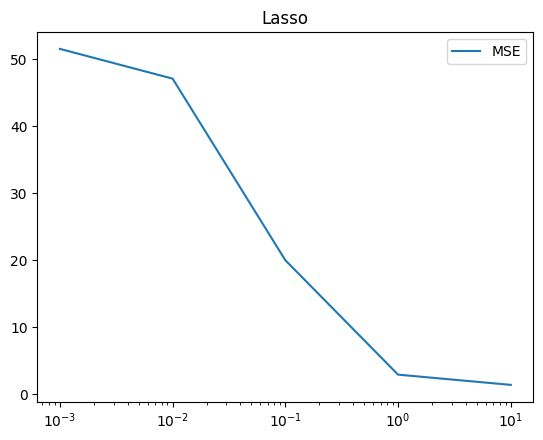

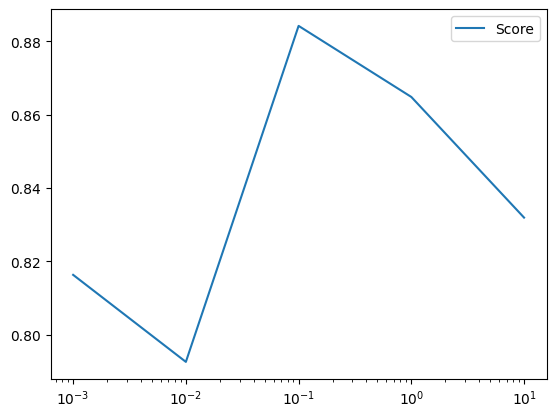

In [10]:
plt.plot(alpha, mse, label = "MSE")
plt.legend()
plt.xscale('log') 
plt.title("Lasso")
plt.show()

plt.plot(alpha, score, label = "Score")
plt.legend()
plt.xscale('log') 
plt.show()

In [11]:
#6

alpha = [0.001,0.01,0.1,1,10]
mse = []
score = []
for al in alpha:
    ridgereg = Ridge(al)
    ridgereg.fit(X_trainpoly, y_train)
    y_train_pred = ridgereg.predict(X_trainpoly)
    y_test_pred = ridgereg.predict(X_testpoly)
    mse.append(np.mean(cross_val_score(ridgereg, X_testpoly, y_test_pred, scoring='neg_mean_squared_error') * -1))
    score.append(ridgereg.score(X_testpoly, y_test))

C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.70436e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


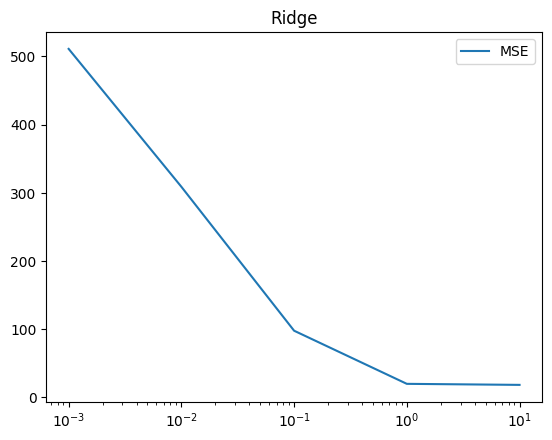

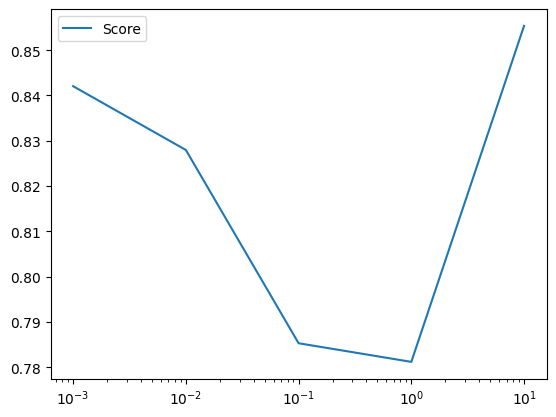

In [12]:
plt.plot(alpha, mse, label = "MSE")
plt.legend()
plt.xscale('log')
plt.title("Ridge")
plt.show()

plt.plot(alpha, score, label = "Score")
plt.legend()
plt.xscale('log') 
plt.show()

C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

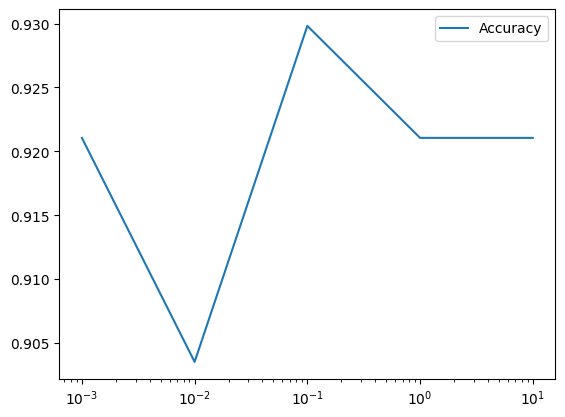

In [16]:
# Regularyzacja dla Regresji Logistycznej

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()
 
y = data.target
X = data.data

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 13)


from sklearn.metrics import accuracy_score

alpha = [0.001,0.01,0.1,1,10]
mse = []
score = []
accuracy = []
for al in alpha:
    logreg = LogisticRegression(random_state=0, penalty="l2", C=1/al).fit(X_train, y_train)
    y_train_pred = logreg.predict(X_train)
    y_test_pred = logreg.predict(X_test)
    mse.append(np.mean(cross_val_score(ridgereg, X_test, y_test_pred, scoring='neg_mean_squared_error') * -1))
    score.append(ridgereg.score(X_test, y_test))
    accuracy.append(accuracy_score(y_test, y_test_pred))
    
plt.plot(alpha, accuracy, label = "Accuracy")
plt.legend()
plt.xscale('log') 
plt.show()